<img src="img/food.jpg" width=800 height=200 />

## Introduction

#### Note from the Kaggle dataset creator:

"This dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students. There are 126 responses from students. Data is raw and uncleaned. Cleaning is in the process and as soon as that is done, additional versions of the data will be posted.

Acknowledgements
Thank you to all the students of Mercyhurst University who agreed to participate in this survey.

Inspiration
How important is nutrition information for today's college kids? Is their taste in food defined by their food preferences when they were children? Are kids of parents who cook more likely to make better food choices than others? Are these kids likely to have a different taste compared to others? There a number of open ended questions included in this dataset such as: What is your favorite comfort food? What is your favorite cuisine? that could work well for natural language processing"

In [264]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("data/food_choices_data/food_coded.csv")

In [5]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


Now lets check the shape of our dataset:

In [26]:
df.shape

(125, 61)

According to the shape, we have 125 rows and 61 columns. But the dataset creator claimed that there is 126 participants. Maybe it was a typo?

Anyway, lets check the gender distribution of the participants:

In [257]:
def countGender():
    count_f = 0
    count_m = 0
    
    for i in df["Gender"]:
        if i==1:
            count_f+=1
        else:
            count_m+=1
    return count_f, count_m

In [205]:
gender_count = list(countGender())

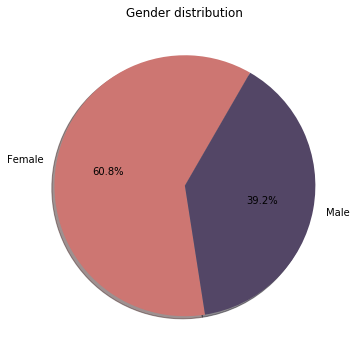

In [252]:
labels = ['Female', 'Male']
sizes = gender_count
colors = ["#CD7672", "#534666"]
plt.figure(figsize=(6,6))
plt.title('Gender distribution')
plt.pie(sizes, labels=labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle=60)
plt.show()

In [258]:
def checkComfortFoodReason():
    stress = 0
    boredom = 0
    sadness = 0
    hunger = 0
    laziness = 0
    cold_weather = 0
    happiness = 0
    watching_tv = 0
    
    for i in df['comfort_food_reasons_coded']:
        if i == 1:
            stress +=1
        elif i == 2:
            boredom += 1
        elif i == 3:
            sadness += 1
        elif i == 4:
            hunger+=1
        elif i == 5:
            laziness+=1
        elif i == 6:
            cold_weather+=1
        elif i == 7:
            happiness+=1
        elif i == 8:
            watching_tv+= 1
        else:
            pass
    
    result = {"stress": stress, "boredom": boredom, 
              "sadness": sadness, "hunger": hunger,
             "laziness": laziness, "cold_weather": cold_weather,
             "happiness": happiness, "watching_tv": watching_tv}
    
    return result

In [255]:
comfort_food_reason = checkComfortFoodReason()
cfr = list([i for i in comfort_food_reason.values()])

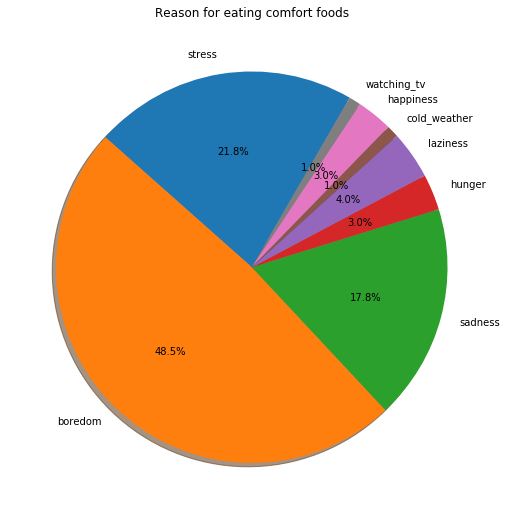

In [256]:
labels = ['stress', 'boredom', 'sadness', 'hunger', 
          'laziness', 'cold_weather', 'happiness', 
         'watching_tv']

sizes = cfr
colors = ["#CD7672", "#534666"]
plt.figure(figsize=(9,9))
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle=60)
plt.title('Reason for eating comfort foods')
plt.show()

Wow, we have a lot of bored students here 😅

Anyway, what is their eating habits?

In [145]:
def checkDietPreference():
    healthy_count = 0
    unhealthy_count = 0
    same_thing_count = 0
    unclear_count = 0
    
    for i in df['diet_current_coded']:
        if i == 1:
            healthy_count +=1
        elif i == 2:
            unhealthy_count += 1
        elif i == 3:
            same_thing_count += 1
        else:
            unclear_count += 1
    
    result = {"Healthy": healthy_count, "Unhealthy": unhealthy_count, "Same food": same_thing_count, "Unclear": unclear_count}
    
    return result

In [157]:
health_count = checkDietPreference()

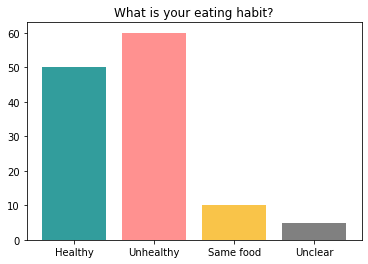

In [234]:
colors = []
key = list(health_count.keys())
value = list(health_count.values())

for k in health_count.keys():
    if k == "Healthy":
        colors.append("#329D9C")
    elif k == "Unhealthy":
        colors.append("#FF9190")
    elif k == "Same food":
        colors.append("#F9C449")
    else:
        colors.append("gray")

plt.title('What is your eating habit?')
plt.bar(range(len(health_count)),value,tick_label=key, color=colors)
plt.show()

In [236]:
comfort_food = [print(i) for i in df['comfort_food']]

none
chocolate, chips, ice cream
frozen yogurt, pizza, fast food
Pizza, Mac and cheese, ice cream
Ice cream, chocolate, chips 
Candy, brownies and soda.
Chocolate, ice cream, french fries, pretzels
Ice cream, cheeseburgers, chips.
Donuts, ice cream, chips
Mac and cheese, chocolate, and pasta 
Pasta, grandma homemade chocolate cake anything homemade 
chocolate, pasta, soup, chips, popcorn
Cookies, popcorn, and chips
ice cream, cake, chocolate
Pizza, fruit, spaghetti, chicken and Potatoes  
cookies, donuts, candy bars
Saltfish, Candy and Kit Kat 
chips, cookies, ice cream
Chocolate, ice crea 
pizza, wings, Chinese
Fast food, pizza, subs
chocolate, sweets, ice cream
burgers, chips, cookies
Chilli, soup, pot pie
Soup, pasta, brownies, cake
chocolate, ice cream/milkshake, cookies
Chips, ice cream, microwaveable foods 
Chicken fingers, pizza 
cookies, hot chocolate, beef jerky
Tomato soup, pizza, Fritos, Meatball sub, Dr. Pepper
cookies, mac-n-cheese, brownies, french fries, 
chips and dip, 

In [237]:
def cookingFrequency():
    daily = 0
    twice_a_week = 0
    not_often = 0
    on_holidays = 0
    never = 0
    
    for i in df['cook']:
        if i == 1:
            daily+=1
        elif i == 2:
            twice_a_week+=1
        elif i == 3:
            not_often+=1
        elif i == 4:
            on_holidays+=1
        elif i == 5:
            never+=1
        else:
            pass
    
    result = {"daily": daily, "twice a week": twice_a_week, 
              "not often": not_often, "on holidays": on_holidays,
             "never" : never}
    
    return result

In [238]:
cooks_list = cookingFrequency()

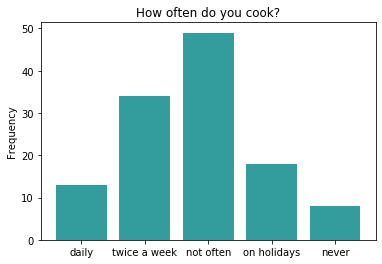

In [239]:
cook_key = list(cooks_list.keys())
cook_value = list(cooks_list.values())

plt.ylabel('Frequency')
plt.title('How often do you cook?')
plt.bar(range(len(cooks_list)), cook_value, tick_label=cook_key, color="#329D9C")
plt.show()